In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
data = pd.read_csv('Final_AA.csv')
data.head()

,Headlines,Descriptions,Authors,Published_Dates,Publication,Articles,category,Keywords,Summaries,Source_URLs
0,Object : Alcoholics Anonymous Badge,A History of the World is a partnership betwee...,NaN,None,NaN,The contributors father was a member of Alcoho...,{},"['unless', 'content', 'views', 'anonymous', 'b...",The contributor's father was a member of Alcoh...,http://www.bbc.co.uk/ahistoryoftheworld/object...
1,Every university 'needs' Alcoholics Anonymous ...,Alcoholics Anonymous says the number of younge...,NaN,2018-07-31 16:54:32+00:00,BBC News,Image copyright Getty Images Alcoholics Anonym...,{},"['student', 'really', 'anonymous', 'younger', ...",Image copyright Getty ImagesAlcoholics Anonymo...,https://www.bbc.co.uk/news/amp/uk-wales-45023075
2,What happens in an Alcoholics Anonymous meeting?,Members of Alcoholics Anonymous are marking it...,NaN,10 June 2010,BBC News,Image caption The true nature of alcoholism is...,{},"['happens', 'anonymous', 'bad', 'group', 'meet...",Image caption The true nature of alcoholism is...,https://www.bbc.co.uk/news/10280806
3,The many groups that have copied Alcoholics An...,Alcoholics Anonymous was founded 80 years ago....,NaN,9 June 2015,BBC News,Image copyright Other Image caption An AA meet...,{},"['copied', 'anonymous', 'steps', '12step', 'me...","But Peter hasn't tasted alcohol in 34 years, a...",https://www.bbc.co.uk/news/magazine-33049093
4,Alcoholics Anonymous,NaN,NaN,None,BBC,NaN,{},"['alcoholics', 'anonymous']",NaN,https://www.bbc.co.uk/programmes/topics/Alcoho...


In [3]:
print("Types and counts of stories", data.groupby(['Publication']).size())

Types and counts of stories Publication
Ahmedabad Mirror                                                                            1
BBC                                                                                       128
BBC Cymru Fyw                                                                               2
BBC News                                                                                  243
BBC News Indonesia                                                                          2
BBC News Mundo                                                                              1
BBC News O'zbek                                                                             1
BBC News Pidgin                                                                             1
BBC News Tiáº¿ng Viá»‡t                                                                     1
BBC News Ù�Ø§Ø±Ø³ÛŒ                                                                         1
BBC News à¸šà¸µà¸šà¸

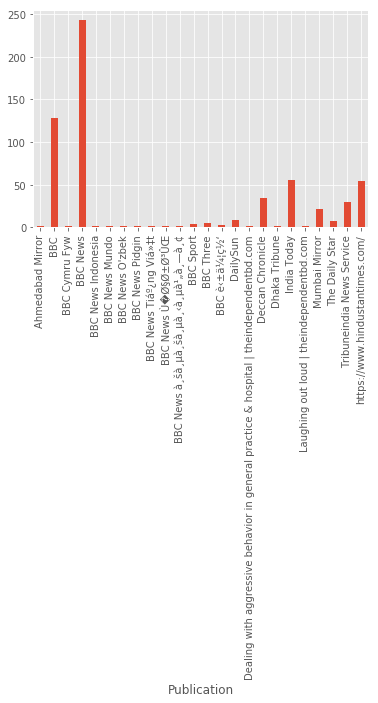

In [4]:
data.groupby(['Publication']).size().plot(kind='bar')

In [5]:
BBC = data[data["Publication"] == "BBC News"]

In [6]:
import nltk

# Fill any blank fields
BBC.Headlines.fillna("", inplace=True)
BBC.Articles.fillna("", inplace=True)

# Join the Headlines and Articles
all_Articles = BBC.Headlines.str.cat(BBC.Articles, sep=' ')

# Tokenize. The NLTK tokenizer isn't awesome. Spacy has a nice one, but I don't think it is installed
words = nltk.word_tokenize(" ".join(all_Articles.tolist()))


C:\Users\GM\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [7]:
BBC.head()

,Headlines,Descriptions,Authors,Published_Dates,Publication,Articles,category,Keywords,Summaries,Source_URLs
1,Every university 'needs' Alcoholics Anonymous ...,Alcoholics Anonymous says the number of younge...,NaN,2018-07-31 16:54:32+00:00,BBC News,Image copyright Getty Images Alcoholics Anonym...,{},"['student', 'really', 'anonymous', 'younger', ...",Image copyright Getty ImagesAlcoholics Anonymo...,https://www.bbc.co.uk/news/amp/uk-wales-45023075
2,What happens in an Alcoholics Anonymous meeting?,Members of Alcoholics Anonymous are marking it...,NaN,10 June 2010,BBC News,Image caption The true nature of alcoholism is...,{},"['happens', 'anonymous', 'bad', 'group', 'meet...",Image caption The true nature of alcoholism is...,https://www.bbc.co.uk/news/10280806
3,The many groups that have copied Alcoholics An...,Alcoholics Anonymous was founded 80 years ago....,NaN,9 June 2015,BBC News,Image copyright Other Image caption An AA meet...,{},"['copied', 'anonymous', 'steps', '12step', 'me...","But Peter hasn't tasted alcohol in 34 years, a...",https://www.bbc.co.uk/news/magazine-33049093
5,Should there be a word for an 'almost alcoholic'?,"Everybody thinks they know what an ""alcoholic""...",NaN,8 January 2014,BBC News,Image copyright Thinkstock Everybody thinks th...,{},"['term', 'problems', 'alcoholic', 'alcoholics'...",Should there be a word that bridges the gap be...,https://www.bbc.co.uk/news/magazine-25639406
8,Drunk woman drove from Alcoholics Anonymous me...,The 41-year-old pleaded guilty to driving whil...,NaN,2018-02-26 17:01:11+00:00,BBC News,A woman has pleaded guilty to being almost eig...,{},"['drove', 'anonymous', 'west', 'times', 'meeti...",A woman has pleaded guilty to being almost eig...,https://www.bbc.co.uk/news/amp/uk-scotland-edi...


In [8]:
from nltk.corpus import stopwords
import string

# clearly more cleaning is needed here, but really I should get a better tokenizer
stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

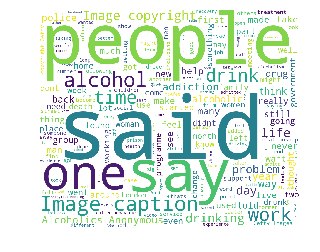

In [9]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(cleanwords))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [10]:
# Bigrams should be more interesting

bigrams = nltk.bigrams(cleanwords)

In [11]:
# look at the most common. 

from collections import Counter

counter = Counter(bigrams)
print(counter.most_common(10))

[(('Image', 'caption'), 364), (('Image', 'copyright'), 279), (('Alcoholics', 'Anonymous'), 185), (('Getty', 'Images'), 80), (('copyright', 'Getty'), 77), (('New', 'York'), 60), (('two', 'years'), 55), (('years', 'ago'), 50), (('She', 'said'), 49), (('young', 'people'), 47)]


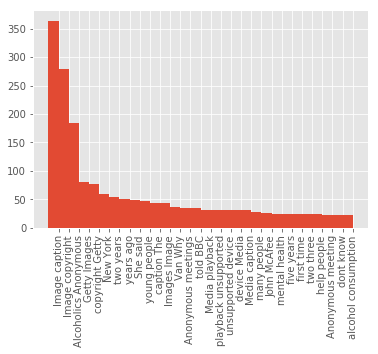

In [12]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=90)

#plt.barh(indexes, values, width)
#plt.yticks(indexes + width * 0.2, labels)
plt.show()